In [16]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from sim_utils import *
from simulation import *

### lda

In [17]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
    }
model_type = "lda"
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[], "euclid":[]}

for i in range(num_simulations):
    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_args=doc_args
        )
    s.estimate_distributions(
        is_output=True,
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th work".format(i+1))
    print("  ")

with open("../data/{}/score_dict_{}.pickle".format(model_type,num_simulations),"wb") as f:
    pickle.dump(score_dict,f)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [01:12<00:00, 68.92it/s]


  
date:2023-07-14 14:10:11.606789
finished 1th work
  


100%|██████████| 5000/5000 [01:14<00:00, 66.93it/s]


  
date:2023-07-14 14:11:40.472864
finished 2th work
  


100%|██████████| 5000/5000 [01:21<00:00, 60.99it/s]


  
date:2023-07-14 14:13:18.420248
finished 3th work
  


100%|██████████| 5000/5000 [02:39<00:00, 31.36it/s]


  
date:2023-07-14 14:16:21.776250
finished 4th work
  


100%|██████████| 5000/5000 [01:51<00:00, 45.01it/s]


  
date:2023-07-14 14:18:30.170545
finished 5th work
  


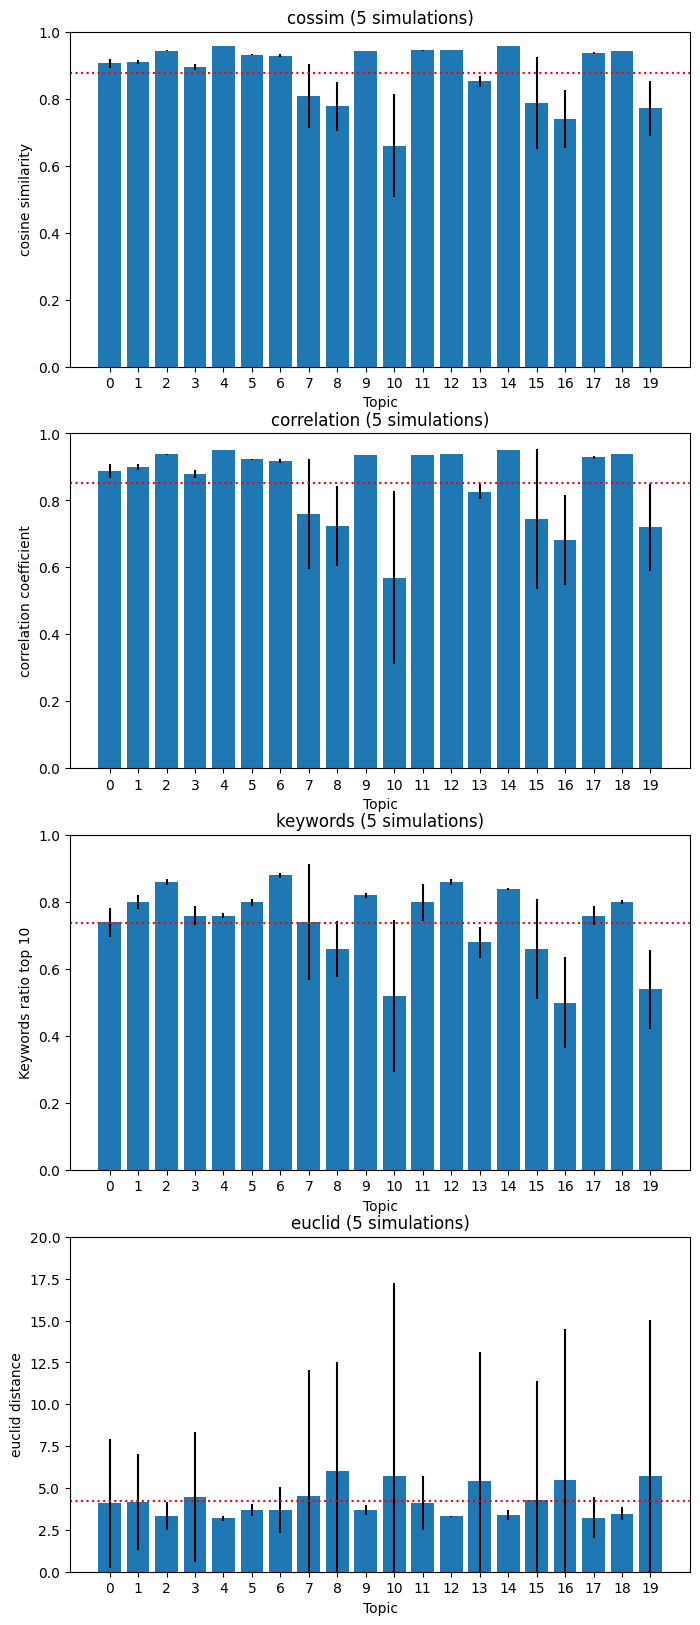

In [22]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

In [12]:
score_type = "euclid"
df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])

fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
mean = df_score_res.mean()
var = df_score_res.var()
ax.bar(x, mean, yerr=var)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(-2.5, 20)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Euclid distance")
ax.set_title("Euclid distance ({} simulations)".format(num_simulations))
plt.savefig("../fig/{}_{}.png".format(model_type,score_type))
plt.show()

KeyError: 'euclid'